<a href="https://colab.research.google.com/github/Vakhranev/MDB/blob/main/%D0%A1%D0%BE%D0%BE%D1%82%D0%BD%D0%BE%D1%88%D0%B5%D0%BD%D0%B8%D0%B5%20%D1%81%D0%BB%D1%83%D0%B6%D0%B5%D0%B1%D0%BD%D1%8B%D1%85%20%D0%B8%20%D0%B7%D0%BD%D0%B0%D1%87%D0%B8%D0%BC%D1%8B%D1%85%20%D1%81%D0%BB%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


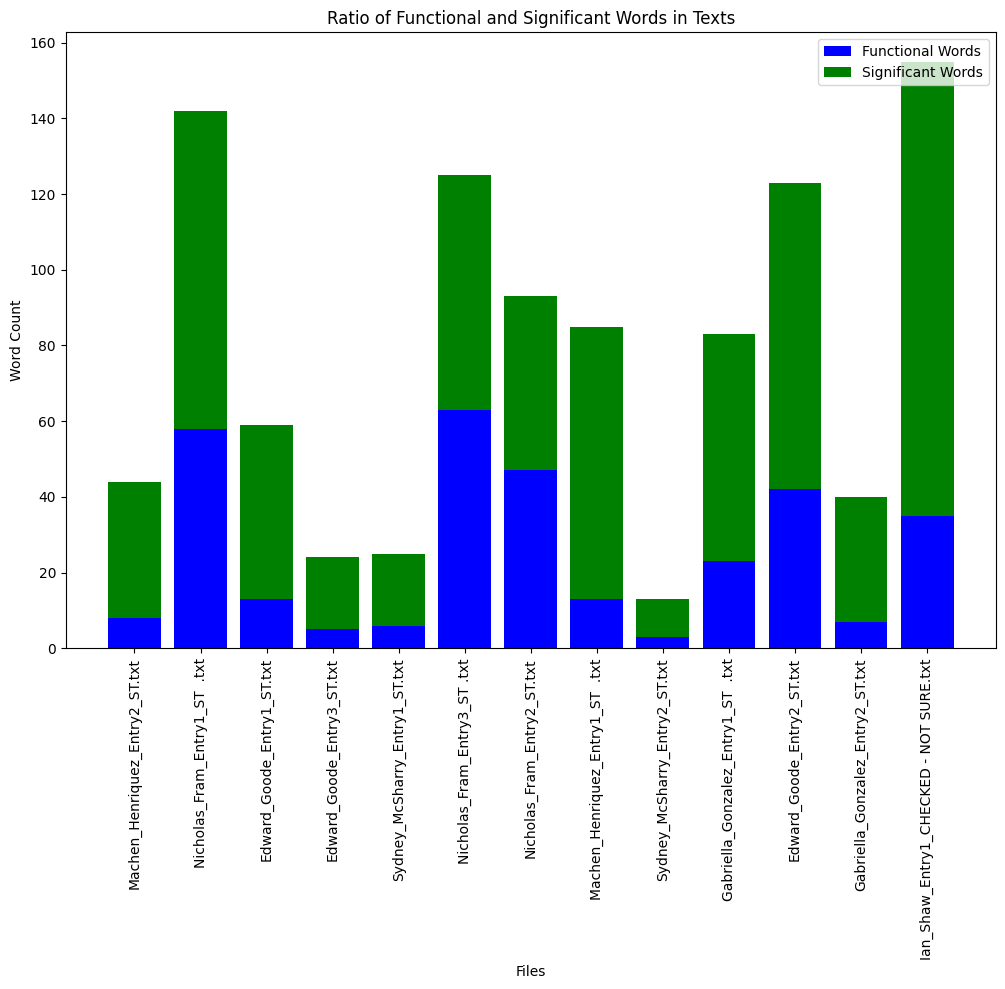

In [2]:
import os
import re
import matplotlib.pyplot as plt
from collections import Counter
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Устанавливаем стоп-слова для русского языка
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

# Функция для очистки текста от тегов, [unclear] и приведения к нижнему регистру
def clean_text(text):
    # Удаляем теги
    cleaned_text = re.sub(r'<[^>]+>|(\[unclear\])', '', text)
    # Приводим к нижнему регистру и токенизируем текст
    words = word_tokenize(cleaned_text.lower(), language='russian')
    return words

# Путь к директории с текстовыми файлами
directory = "/content/Students_texts"

# Списки для хранения количества служебных и значимых слов в каждом файле
functional_words_count = []
significant_words_count = []
file_names = []

# Обрабатываем каждый файл в директории
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        filepath = os.path.join(directory, filename)
        with open(filepath, "r", encoding="utf-8") as file:
            text = file.read()
            words = clean_text(text)

            # Считаем количество служебных и значимых слов в тексте
            functional_words = [word for word in words if word in stop_words]
            significant_words = [word for word in words if word not in stop_words]
            functional_words_count.append(len(functional_words))
            significant_words_count.append(len(significant_words))
            file_names.append(filename)

# Строим столбчатую диаграмму
plt.figure(figsize=(12, 8))
plt.bar(file_names, functional_words_count, label='Functional Words', color='b')
plt.bar(file_names, significant_words_count, bottom=functional_words_count, label='Significant Words', color='g')

plt.xlabel("Files")
plt.ylabel("Word Count")
plt.title("Ratio of Functional and Significant Words in Texts")
plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.show()